Define gradient descent learning rule and prediction function

In [ ]:
gdlearn <- function(x, eta, niter, threshold){
    "This function accepts an input data.frame, learning rate and number of iterations and performs
        batch gradient descent learning"

        #weight <- rep(0.1, dim(x)[2]-1)
        weight<-runif(dim(x)[2]-1,-1,1)
        errors <- rep(0, niter)
        label.index<-length(x[1,])
        features<-x[,-label.index]
        labels<-x[,label.index]
        
        # loop over number of epochs niter
        jj<-1
        err.value<-10
        while(jj<niter && err.value>threshold){
               delta.weight<-rep(0,dim(x)[2]-1)
                # loop through training data set
                squared.error<-0
                for (ii in 1:nrow(x)) 
                {
                        # Prediction
                        z <- sum(weight[1:length(weight)] * as.numeric(features[ii,])) 
                        weightdiff <- eta * (as.numeric(labels[ii]) - z) * as.numeric(features[ii,])
                        delta.weight <- delta.weight + weightdiff
                        
                        # update error rate
                        squared.error<-squared.error+(as.numeric(labels[ii])-z)*(as.numeric(labels[ii])-z)       
                }
              errors[jj]<-squared.error/nrow(x)/2
              err.value<-errors[jj]
              weight<-weight + delta.weight/nrow(x)
              jj<-jj+1
        }

        return(list(v1=weight,v2=errors))
}

predict <- function(test,weight) {
    # number of test instances
    test.dimension<-dim(test)
    test.num<-test.dimension[1]
    # predicted labels
    pred.labels <- rep(0, test.num)
    # create biase for each instance
    biase<-rep(1,test.num)
    biase<-data.frame(biase)
    test<-cbind(biase,test)
    for(ii in 1:test.num)
      {
            z <- sum(weight[1:length(weight)] * as.numeric(test[ii,])) 
            pred.labels[ii]<-ifelse(z>0,1,-1)
        }
    return(pred.labels)
}

Import and Process Data

In [2]:
class1 <- read.table("Class1.txt",header=T,sep=",")
class2 <- read.table("Class2.txt",header=T,sep=",")

# Adding Labels
class1 <- cbind(class1, rep(1, nrow(class1)))
class2 <- cbind(class2, rep(-1, nrow(class2)))

# Combining class1 and class2 data frames
names(class1) <- c("Weight", "Height", "Label")
names(class2) <- c("Weight", "Height", "Label")
d.set <- rbind(class1, class2)

# Adding Biases
d.set.bias <- rep(1, nrow(d.set))
d.set <- data.frame(cbind(d.set.bias, d.set))

names(d.set) <- c("Bias", "Weight", "Height", "Label")

In [3]:
# Randomizing class1 and class2 into training and test datasets
indexes <- sample(nrow(d.set), .8*nrow(d.set))
train <- d.set[indexes,]
test <- d.set[-indexes,]

Train network and test network

In [4]:
iterations <- 2000
weights <- gdlearn(train, .05, iterations, .1)
prediction <- predict(test[,3:dim(test)[2]-1], weights$v1)
prediction

[1]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1
[26] -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1  1

Report Test Classification Performance

In [5]:
# Report confusion matrix
tt <- table(test[,dim(test)[2]], prediction)
tt

# Report TPR
TPR <- (tt[4][1] / (tt[4][1] + tt[3][1])) * 100
TPR

# Report FPR
FPR <- (tt[2][1] / (tt[2][1] + tt[1][1])) * 100
FPR

# Report accuracy
accuracy <- (tt[1][1] + tt[4][1]) / (tt[1][1] + tt[2][1] + tt[3][1] + tt[4][1])
accuracy

    prediction
     -1  1
  -1 13  4
  1   0 23

[1] 85.18519

[1] 0

[1] 0.9

Report test error rate

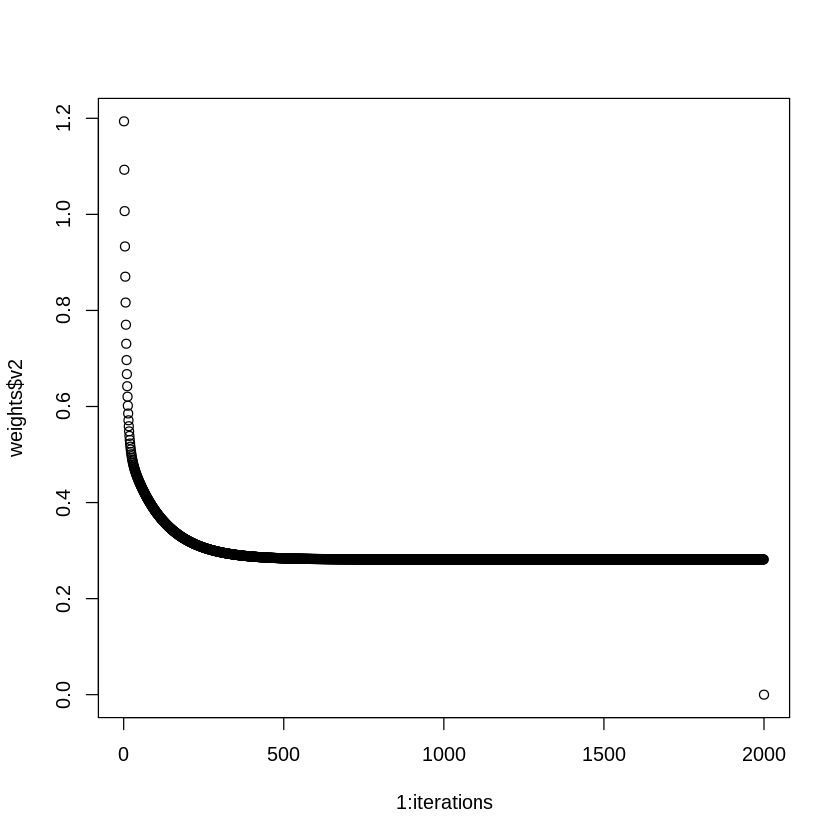

In [6]:
plot(1:iterations, weights$v2)

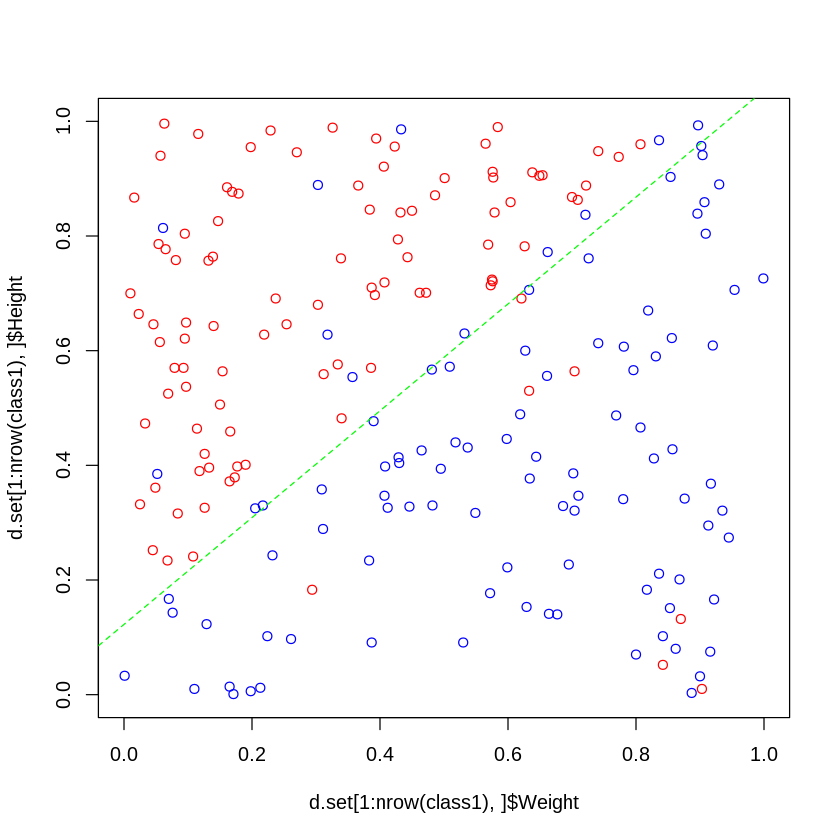

In [7]:
# Calculate line slope and intercept
slope<-weights$v1[2]/weights$v1[3]*(-1)
intercept<-weights$v1[1]/weights$v1[3]*(-1)

# Plot C1 and C2 as red and blue respectively
plot(d.set[1:nrow(class1),]$Weight,d.set[1:nrow(class1),]$Height,xlim=c(0:1),ylim=c(0:1),col="red")
points(d.set[nrow(class1)+1:nrow(d.set),]$Weight,d.set[nrow(class1)+1:nrow(d.set),]$Height,col="blue")

# Draw line
abline(intercept,slope,col="green",lty=2)